# Implementing GD, SGD and Mini Batch SGD
21BAI1007 Goutham Krishnan

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
df = pd.read_csv('diabetes.csv')

In [27]:
df.shape

(768, 9)

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Cleaning and processing diabetes dataset - 21BAI1007

In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1:]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Creating and training the model - 21BAI1007

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train))
X_test_scaled = scaler.transform(np.array(X_test))

In [32]:
X_train_scaled_bias = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_test_scaled_bias = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]

In [53]:
def classification_model(input_dim):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [54]:
def train_model(optimizer, X_train, y_train, epochs=100, batch_size=None):
    model = classification_model(input_dim=X_train.shape[1])
    model.compile(optimizer=optimizer, loss='binary_crossentropy')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    return model, history.history['loss']

### Results from the model - 21BAI1007

In [55]:
gd_model, gd_loss = train_model(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), X_train=X_train_scaled_bias, y_train=y_train)

In [56]:
sgd_model, sgd_loss = train_model(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), X_train=X_train_scaled_bias, y_train=y_train, batch_size=1)

In [57]:
minibatch_sgd_model, minibatch_sgd_loss = train_model(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), X_train=X_train_scaled_bias, y_train=y_train, batch_size=32)

In [58]:
gd_test_loss = gd_model.evaluate(X_test_scaled_bias, y_test, verbose=0)
sgd_test_loss = sgd_model.evaluate(X_test_scaled_bias, y_test, verbose=0)
minibatch_sgd_test_loss = minibatch_sgd_model.evaluate(X_test_scaled_bias, y_test, verbose=0)

In [59]:
print("GD Test Loss:", gd_test_loss)
print("SGD Test Loss:", sgd_test_loss)
print("Mini-batch SGD Test Loss:", minibatch_sgd_test_loss)

GD Test Loss: 0.5320150256156921
SGD Test Loss: 0.5021246075630188
Mini-batch SGD Test Loss: 0.6190852522850037


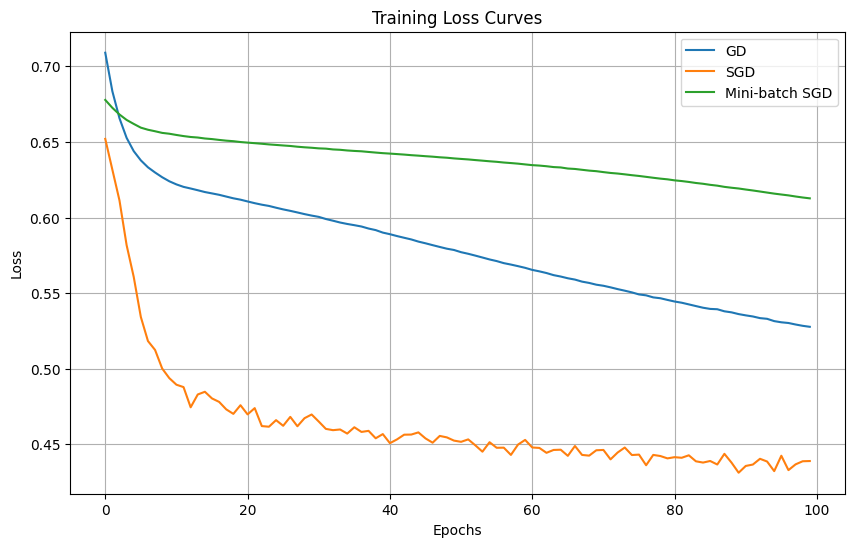

In [60]:
import matplotlib.pyplot as plt

# Plot the training loss curves
plt.figure(figsize=(10, 6))
plt.plot(gd_loss, label='GD')
plt.plot(sgd_loss, label='SGD')
plt.plot(minibatch_sgd_loss, label='Mini-batch SGD')
plt.title('Training Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
